# Praca Domowa 2
Jakub Grunas, Maciej Pawlikowski, Bartosz Siński

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import numpy as np
import os
import imghdr

In [125]:
#______________________________Covid_CT________________________________
covid_meta_full=pd.read_excel("Covid-CT-Metainfo.xlsx")
#Done somthing with age column for EDA purposes
age=covid_meta["Age"].dropna()
age=[x if x!="40+" else 40 for x in age]
age=[x if x!="Young Child" else 10 for x in age]
#because of course there are useless spaces
covid_meta["Gender"]=covid_meta["Gender"].replace("M ","M")
covid_meta["Gender"]=covid_meta["Gender"].replace("F ","F")
gender=[not a for a in covid_meta["Age"].isna()]
gender=covid_meta["Gender"][gender]
#______________________________VinDr_CXR________________________________
labels_vindr=pd.read_csv("image_labels_test.csv")
annotations_vindr=pd.read_csv("annotations_test.csv")


In [30]:
padchest_df = pd.read_csv('./metadata/padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')
jsrt_df = pd.read_csv('./metadata/jsrt/CLNDAT_EN.txt', sep='\t', names = ['ImageID', 'Nodule_size', 'Degree_of_subtlety', 'Age','Sex','X','Y','Type','Location', 'Diagnosis'], index_col=False)
padchest_df['Age'] = pd.to_numeric(padchest_df['StudyDate_DICOM'].astype('string').str.slice(0,4)) - padchest_df['PatientBirth']
padchest_df["PatientSex_DICOM"].replace({"O": "F"}, inplace=True)
jsrt_df["Age"].replace({"?": 62}, inplace=True)
jsrt_df["Age"] = jsrt_df["Age"].astype(int)
jsrt_df1 = pd.read_csv('./metadata/jsrt/CNNDAT_EN.txt', sep=' ', names = ['ImageID', 'Age', 'Sex', 'Type'], index_col=False)
jsrt_df2 = pd.read_csv('./metadata/jsrt/CLNDAT_EN.txt', sep='\t', names = ['ImageID', 'Nodule_size', 'Degree_of_subtlety', 'Age','Sex','X','Y','Type','Location', 'Diagnosis'], index_col=False)

c:\users\kuba\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
chestxray_df = pd.read_csv("covid-chestxray-dataset/metadata.csv")
path1 = 'The IQ-OTHNCCD lung cancer dataset\\Bengin cases'
path2 = 'The IQ-OTHNCCD lung cancer dataset\\Malignant cases'
path3 = 'The IQ-OTHNCCD lung cancer dataset\\Normal cases'
paths_iq = [path1,path2,path3]
path_x= ['covid-chestxray-dataset\\images']

## Data balance

VinDr_CXR dataset doesn't have any metadata other than disease and its location. IQ-OTHNCCD lung cancer dataset doesn't have any metadata at all.

### Balance of classes in training/test sets

Only IQ-OTHNCCD lung cancer dataset contains test cases and there is 197 test cases to 1097 training cases.

### Distribution of patients age

In [4]:
def plot_age(age,dataset_name):
    sns.violinplot(y=age)
    plt.title(f"Age {dataset_name}")
    plt.show()

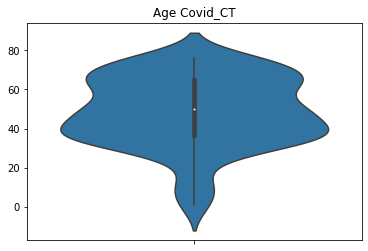

In [128]:
ages=[age]
dataset_names=["Covid_CT"]
#Plotting code
for age,dataset_name in zip(ages,dataset_names):
    plot_age(age,dataset_name)


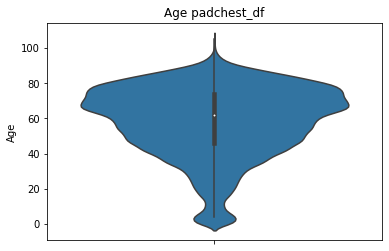

In [9]:
plot_age(padchest_df['Age'], 'padchest_df')

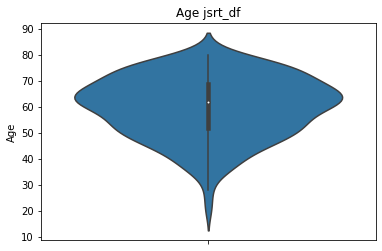

In [28]:
plot_age(jsrt_df['Age'], 'jsrt_df')

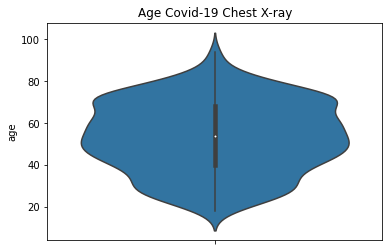

In [19]:
plot_age(chestxray_df['age'],'Covid-19 Chest X-ray')

### Gender balance

In [7]:
def gender_balance(gender,dataset_name):
    plot_data=np.transpose(itemfreq(gender))
    plt.pie(plot_data[1],labels=plot_data[0])
    plt.title(dataset_name)
    plt.show()

<ipython-input-129-feafde06e1b9>:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  plot_data=np.transpose(itemfreq(gender))


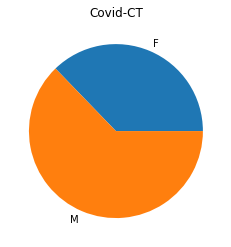

In [129]:

gender2=covid_meta["Gender"].dropna()


gender_balance(gender2,"Covid-CT")

<ipython-input-15-297b8ec3ec2b>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  plot_data=np.transpose(itemfreq(gender))


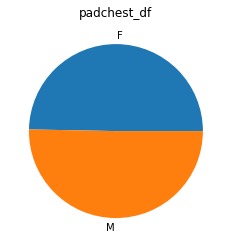

In [40]:
gender_balance(padchest_df['PatientSex_DICOM'].dropna(), 'padchest_df')

<ipython-input-15-297b8ec3ec2b>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  plot_data=np.transpose(itemfreq(gender))


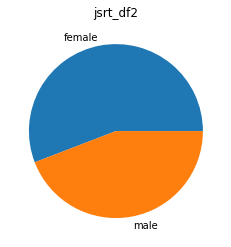

In [19]:
gender_balance(jsrt_df2['Sex'].dropna(), 'jsrt_df2')

C:\Users\sinsk\AppData\Local\Temp/ipykernel_7224/1291875262.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  plot_data=np.transpose(itemfreq(gender))


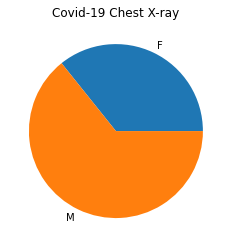

In [18]:
gender_balance(chestxray_df['sex'].dropna(), 'Covid-19 Chest X-ray')

### Distribution of age and gender

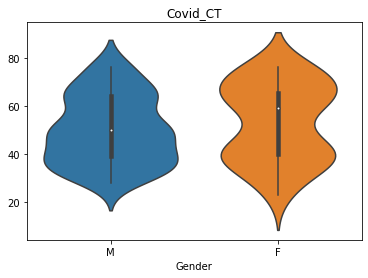

In [131]:
sns.violinplot(x=gender, y=age)
plt.title("Covid_CT")
plt.show()

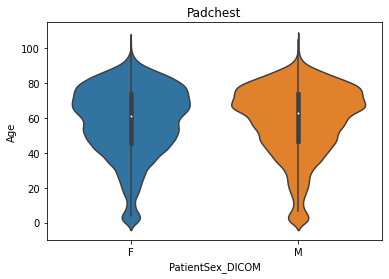

In [31]:
sns.violinplot(x=padchest_df['PatientSex_DICOM'].dropna(), y=padchest_df['Age'])
plt.title("Padchest")
plt.show()

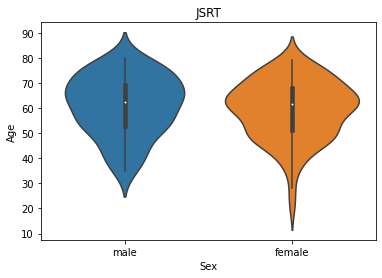

In [32]:
sns.violinplot(x=jsrt_df['Sex'].dropna(), y=jsrt_df['Age'])
plt.title("JSRT")
plt.show()

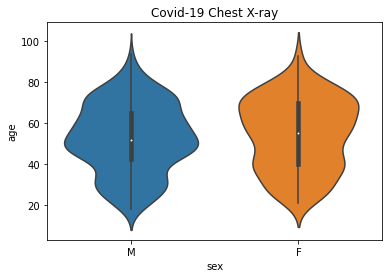

In [17]:
sns.violinplot(x=chestxray_df['sex'], y=chestxray_df['age'])
plt.title("Covid-19 Chest X-ray")
plt.show()

### Distribution of age and healthiness 

Databases don't hold age data for healthy patients

## Metadata analysis

### Metadata list

Covid- CT:
* Patient ID
* Gender
* Age
* Location
* Medical history
* Time
* Severity
* DOI
* Other diseases(Unfortunately most of that data are NaNs and the rest doesn't bring a lot of information)

VinDr_CXR:
* Disease(s)
* symptoms location

JSRT:

In [34]:
jsrt_df.columns.tolist()

['ImageID',
 'Nodule_size',
 'Degree_of_subtlety',
 'Age',
 'Sex',
 'X',
 'Y',
 'Type',
 'Location',
 'Diagnosis']

Padchest:

In [35]:
padchest_df.columns.tolist()

['Unnamed: 0',
 'ImageID',
 'ImageDir',
 'StudyDate_DICOM',
 'StudyID',
 'PatientID',
 'PatientBirth',
 'PatientSex_DICOM',
 'ViewPosition_DICOM',
 'Projection',
 'MethodProjection',
 'Pediatric',
 'Modality_DICOM',
 'Manufacturer_DICOM',
 'PhotometricInterpretation_DICOM',
 'PixelRepresentation_DICOM',
 'PixelAspectRatio_DICOM',
 'SpatialResolution_DICOM',
 'BitsStored_DICOM',
 'WindowCenter_DICOM',
 'WindowWidth_DICOM',
 'Rows_DICOM',
 'Columns_DICOM',
 'XRayTubeCurrent_DICOM',
 'Exposure_DICOM',
 'ExposureInuAs_DICOM',
 'ExposureTime',
 'RelativeXRayExposure_DICOM',
 'ReportID',
 'Report',
 'MethodLabel',
 'Labels',
 'Localizations',
 'LabelsLocalizationsBySentence',
 'labelCUIS',
 'LocalizationsCUIS',
 'Age']

For Covid-19 Chest X-Ray dataset:

In [10]:
chestxray_df.columns.tolist()

['patientid',
 'offset',
 'sex',
 'age',
 'finding',
 'RT_PCR_positive',
 'survival',
 'intubated',
 'intubation_present',
 'went_icu',
 'in_icu',
 'needed_supplemental_O2',
 'extubated',
 'temperature',
 'pO2_saturation',
 'leukocyte_count',
 'neutrophil_count',
 'lymphocyte_count',
 'view',
 'modality',
 'date',
 'location',
 'folder',
 'filename',
 'doi',
 'url',
 'license',
 'clinical_notes',
 'other_notes',
 'Unnamed: 29']

### Are there children

In [12]:
def count_children(age,database_name):
    children=[]
    for a in age:
        if(a<18):
            children.append(a)
    if(len(age)>0):
        print(f'In {database_name} database there are {len(children)} children, which is {np.round(10000*len(children)/len(age))/100}% of the database.')
    else:
        print(f'In {database_name} database there is unknown number of children.')

In [117]:

database_names=["Covid-Ct","VinDr_CXR"]
ages=[age,[]]

def count_children(age,database_name):
    children=[]
    for a in age:
        if(a<18):
            children.append(a)
    if(len(age)>0):
        plot_age(children)
        print(f'In {database_name} database there are {len(children)} children, which is {np.round(10000*len(children)/len(age))/100}% of the database.')
    else:
        print(f'In {database_name} database there is unknown number of children.')
    
for age, database_name in zip(ages,database_names):
    children=count_children(age,database_name)



In Covid-Ct database there is unknown number of children.
In VinDr_CXR database there is unknown number of children.


In [39]:
database_names=["padchest","jsrt"]
ages=[padchest_df['Age'],jsrt_df['Age']]

def count_children(age,database_name):
    children=[]
    for a in age:
        if(a<18):
            children.append(a)
    if(len(age)>0):
        print(f'In {database_name} database there are {len(children)} children, which is {np.round(10000*len(children)/len(age))/100}% of the database.')
    else:
        print(f'In {database_name} database there is unknown number of children.')
    
for age, database_name in zip(ages,database_names):
    children=count_children(age,database_name)


In padchest database there are 7186 children, which is 4.47% of the database.
In jsrt database there are 0 children, which is 0.0% of the database.


In [11]:
print('In IQ-OTHNCCD lung cancer database there is unknown number of children.')

In IQ-OTHNCCD lung cancer database there is unknown number of children.


In [16]:
count_children(chestxray_df['age'],'Covid-19 Chest X-ray')

In Covid-19 Chest X-ray database there are 0 children, which is 0.0% of the database.


### What data is stored in DICOM?

None of our datasets contained images in DICOM form

In padchest dataset DICOM attributes were moved to metadata dataframe

### Missing metadata

In [122]:
print("_______________________________________VinDr-CXR_______________________________")
print(labels_vindr.info())
print(annotations_vindr.info())
print("_______________________________________Covid-CT_______________________________")
print(covid_meta.info())

_______________________________________VinDr-CXR_______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            3000 non-null   object
 1   Aortic enlargement  3000 non-null   int64 
 2   Atelectasis         3000 non-null   int64 
 3   Calcification       3000 non-null   int64 
 4   Cardiomegaly        3000 non-null   int64 
 5   Clavicle fracture   3000 non-null   int64 
 6   Consolidation       3000 non-null   int64 
 7   Edema               3000 non-null   int64 
 8   Emphysema           3000 non-null   int64 
 9   Enlarged PA         3000 non-null   int64 
 10  ILD                 3000 non-null   int64 
 11  Infiltration        3000 non-null   int64 
 12  Lung Opacity        3000 non-null   int64 
 13  Lung cavity         3000 non-null   int64 
 14  Lung cyst           3000 non-null   int6

In [13]:
print("_______________________________________Padchest_______________________________")
print(padchest_df.info())
print("_______________________________________JSRT_______________________________")
print(jsrt_df2.info())

_______________________________________Padchest_______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160861 entries, 0 to 160860
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       160861 non-null  int64  
 1   ImageID                          160861 non-null  object 
 2   ImageDir                         160861 non-null  int64  
 3   StudyDate_DICOM                  160861 non-null  int64  
 4   StudyID                          160861 non-null  object 
 5   PatientID                        160861 non-null  object 
 6   PatientBirth                     160855 non-null  float64
 7   PatientSex_DICOM                 160857 non-null  object 
 8   ViewPosition_DICOM               91776 non-null   object 
 9   Projection                       160861 non-null  object 
 10  MethodProjection                 160861 non-null 

In [15]:
print("_______________________________________Covid-19 Chest X-ray_______________________________")
print(chestxray_df.info())

_______________________________________Covid-19 Chest X-ray_______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temp

### Redundant data
#### (redundant spaces, insignificant columns, etc.)

In Covid- CT dataset there were quite a few problems:
* some records in gender column had redundant spaces
* in age column some values were heavily generalised ex. "40+"
* unnecessary columns(or with too little non null values): "Location","Other diseases","DOI","Captions","Severity","Medical history"

In VinDr-CXR dataset no redundant data was detected.

In JSRT dataset no redundant data was detected.

In Padchest dataset there were many redundant columns in terms of model training, mainly all DICOM labels as well as some duplicated info.

In Covid-19 Chest X-ray dataset there were many redundant columns as leukocyte_count, neutrophil_count, lymphocyte_count for which less tan 10? of the dataset had non null values.

### Severity of changes

In Covid- CT dataset severity of changes was described in differing levels of detail(for some patients they weren't described).

In VinDr-CXR dataset severity of changes wasn't described.

In JSRT and Padchest the severity of changes wasn't described.

In Covid-19 Chest X-ray dataset severity of changes was described in the form of the clinical notes left by the specialist.

### Are there covid patients

Covid-CT <- I have no idea

VinDr-CXT<- No, dataset is older tha this disease

No covid patients in JSRT and Padchest datasets.

Covid-19 Chest X-ray dataset contains information mainly about covid patients

### What data was deleted

In Covid- CT dataset patient privacy is preserved by removing all patient-specific information from image headers.

In VinnDr-CXR dataset patient privacy is preserved by removing all patient-specific information from image headers.

In Padchest dataset patient privacy is preserved by removing all patient-specific information from image headers.

In JSRT dataset patient privacy is preserved by removing all patient-specific information from image headers.

In ChestXray dataset there was no information about full name of the patients but often there was information about the date of taking the picture and location (even in which hospital the picture was taken).

## Number of images

In [5]:
def image_count_total(dfs):
    return sum(len(df) for df in dfs)

In [6]:
for data,dataname in zip([labels_vindr,covid_meta],["VinDr-CXT","Covid_CT"]):
    print(f'{dataname} dataset has {image_count_total([data])} images')

VinDr-CXT dataset has 3000 images
Covid_CT dataset has 350 images


In [15]:
print(f'Padchest dataset has {image_count_total([padchest_df])} images')

Padchest dataset has 160861 images


In [16]:
print(f'JSRT dataset has {image_count_total([jsrt_df1, jsrt_df2])} images')

JSRT dataset has 247 images


In [6]:
print(f'Covid-19 Chest X-Ray dataset has {image_count_total(chestxray_df)} images')

Covid-19 Chest X-Ray dataset has 282 images


In [10]:
count = 0
for p in paths_iq:
    count += len(os.listdir(p))
print(f'IQ-OTHNCCD lung cancer dataset has {count} images')

IQ-OTHNCCD lung cancer dataset has 1097 images


In [17]:
def unique_examinations_count_ct(dfs, patient_id_column, date_column):
    count = 0
    for df in dfs:
        tmp = df.groupby([patient_id_column, date_column]).size()
        count += sum(tmp.to_frame(name = 'size').reset_index()['size'])
    return count

## Number of unique patients

JSRT database does not identify patients as ell as VinDr-CXT.

In [12]:
def unique_patients(patient_id_column):
    return patient_id_column.nunique()

In [12]:
print(f"Covid_Ct dataset has {unique_patients(covid_meta['Patient ID'])} unique patients")

Covid_Ct dataset has 213 unique patients


In [19]:
print(f"Padchest dataset has {unique_patients(padchest_df['PatientID'])} unique patients")

Padchest dataset has 67625 unique patients


IQ-OTHNCCD lung cancer dataset dos not identify patients

In [13]:
print(f"Covid-19 Chest X-Ray dataset has {unique_patients(chestxray_df['patientid'])} unique patients")

Covid-19 Chest X-Ray dataset has 472 unique patients


## Xray Projections

JSRT database does not contain information about projections as well as Covid_CT and IQ-OTHNCCD lung cancer. On the other hand all observations in VinDr_CXT are postero-anterior (PA).



In [15]:
def rtg_projections(projection_column):
    return projection_column.value_counts()

#### Number of different projections in Padchest dataset

In [21]:
rtg_projections(padchest_df['Projection'])

PA               91728
L                49579
AP_horizontal    14346
AP                4559
COSTAL             630
EXCLUDE             11
UNK                  8
Name: Projection, dtype: int64

#### Number of different projections in Covid-19 Chest X-Ray dataset

In [16]:
rtg_projections(chestxray_df['view'])

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

## Types of images and existence of masks

|             | Images Type | Masks            |
|-------------|:---------:|------------------|
| PadChest    |    RTG    | -                |
| JSRT        |    RTG    | -                |
| VinDr_CXR   | RTG         | None                |
| Covid-CT    | CT        | None               |
| Chest Xray  | RTG       | some images |
| Lung Cancer | CT         | -                |

## DICOM attributes in images

None of our datasets contained images in DICOM form

In [2]:
import os
import imghdr
import re
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image

# Basic Information
| Data base                         | Type of the data base | Tasks                        | Licence                                | Annotations           | Labels         | Dimension |
|-----------------------------------|-----------------------|------------------------------|----------------------------------------|-----------------------|----------------|-----------|
| covid-chestxray-dataset           | Image                 | Classification, Segmentation | Apache 2.0, CC BY-NC-SA 4.0, CC BY 4.0 | Bounding boxes, masks | Ilness lesions | 2d and 3d |
| IQ-OTH/NCCD - Lung Cancer Dataset | Image            | Classification               | ------                                 | None                  | Ilness         | 3d        |
| VinDr-CXT | Image            | Classification+ Localisation               | MIMIC                                 | Bounding boxes                  | Ilness, Lesions        | 2d        |
| Covid_CT | Image            | Classification               | ------                                 | None                  | Ilness         | 2d        |
| JSRT        | Image           | Classification, Segmentation | -----    | X,Y coordinates                                   | Ilness                                            | 2d     |
| PadChest    | Image           | Classification | ------   | None | Illness, lesion| 2d     |

# Information about data
## Image file extenstions

In [3]:
def get_format(paths):
    # paths - list with paths to the folders that contain photo
    formats = []
    for path in paths:
        for file in os.listdir(path):
            filepath = os.path.join(path, file)
            formats.append(imghdr.what(filepath))
    formats_df = pd.DataFrame(formats,columns=['format'])
    print(formats_df.value_counts())


IQ-OTH/NCCD - Lung Cancer data set

In [22]:
get_format(paths_iq)

format
jpeg      1097
dtype: int64


Covid-19 Chest X-Ray data set

In [23]:
path_x= ['covid-chestxray-dataset\\images']
get_format(path_x)

format
jpeg      669
png       259
dtype: int64


Covid_CT

In [3]:
path_x= ['Covid-CT/CT_COVID','Covid-CT/CT_NonCOVID']
get_format(path_x)

format
png       510
jpeg      236
dtype: int64


VinDr-CXT

In [28]:
path_x= ['Input']
get_format(path_x)

format
jpeg      3000
dtype: int64


Padchest

In [4]:
path_padchest = ['padchest analysis/images']
get_format(path_padchest)

format
png       3218
dtype: int64


JSRT dataset - .IMG files

## Informacje o sprzęcie:
* IQ-OTH/NCCD - Lung Cancer data set - scaner  SOMATOM from Siemens
* Covid-19 Chest X-Ray data set - no information
* VinDr-CXT - not specified in documentation
* Covid_CT - not specified in documentation
* JSRT - no information
* Padchest - PhilipsMedicalSystems and ImagingDynamicsCompanyLtd devices

## Annotations format
* IQ-OTH/NCCD - Lung Cancer data set - .csv file
* Covid-19 Chest X-Ray data set - .csv and .json file
* VinDr-CXT -.csv
* Covid_Ct -.csv
* Padchest - no annotations
* JSRT - no annotations

## Proportions of the images

In [6]:
def proportion(paths):
    # paths - list with paths to the folders that contain photo
    propotions = []
    for path in paths:
        for file in os.listdir(path):
            filepath = os.path.join(path, file)
            if(imghdr.what(filepath, h=None)=="png"):
                shape = plt.imread(filepath).shape
            else:
                shape = Image.open(filepath).size
            if shape[0] > shape[1]:
                propotions.append('Vertical')
            if shape[0] < shape[1]:
                propotions.append('Horizontal')
            if shape[0] == shape[1]:
                propotions.append('Symmetrical')
    propotions_df = pd.DataFrame(propotions,columns=['format'])
    print(propotions_df.value_counts())


IQ-OTH/NCCD - Lung Cancer data set

In [24]:
proportion(paths_iq)

format     
Symmetrical    1036
Horizontal       61
dtype: int64


Covid-19 Chest X-Ray data set

In [25]:
proportion(path_x)

format     
Horizontal     565
Vertical       216
Symmetrical    149
dtype: int64


VinDr-CXT

In [9]:
proportion(['Covid-CT/CT_COVID','Covid-CT/CT_NonCOVID'])

format     
Horizontal     503
Vertical       235
Symmetrical      8
dtype: int64


Padchest

In [7]:
proportion(path_padchest)

format     
Horizontal     1701
Vertical       1379
Symmetrical     138
dtype: int64


## Years when pictures were taken
* IQ-OTH/NCCD - Lung Cancer data set - no information
* Covid-19 Chest X-Ray data set - 2004-20020
* Covid_CT- 2019
* VinDr-CXT- 2000-2020
* Padchest - 2009-2011
* JSRT - 1995-1997

## Radiocontrast agents
* IQ-OTH/NCCD - Lung Cancer data set - no information
* Covid-19 Chest X-Ray data set -  no information
* Covid_CT - no information
* VinDr-CXT - no information
* Padchest - no information
* JSRT - no information

## Scatterplot of sizes

In [8]:
def scatter(paths):
    # paths - list with paths to the folders that contain photo
    height = []
    width = []
    for path in paths:
        for file in os.listdir(path):
            filepath = os.path.join(path, file)
            if(imghdr.what(filepath, h=None)=="png"):
                shape = plt.imread(filepath).shape
            else:
                shape = Image.open(filepath).size
            height.append(shape[0])
            width.append(shape[1])
    plt.scatter(width,height)
    plt.ylabel('Height')
    plt.xlabel('Width')
    plt.title('Sizes of the images in dataset')
    plt.show()

IQ-OTH/NCCD - Lung Cancer data set

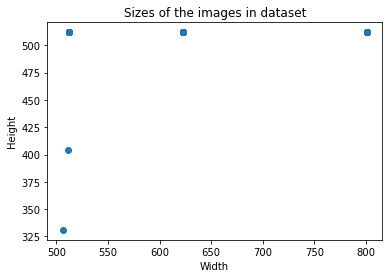

In [60]:
scatter(paths_iq)

Covid-19 Chest X-Ray data set

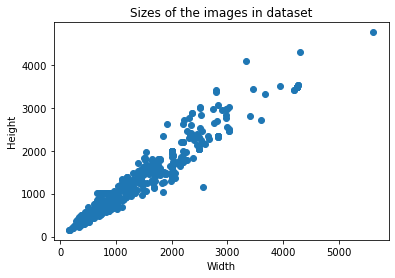

In [61]:
scatter(path_x)

VinDr-CXT

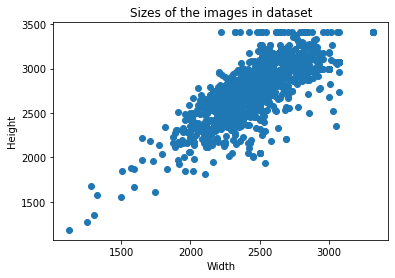

In [30]:
scatter(["Input"])

Covid_CT

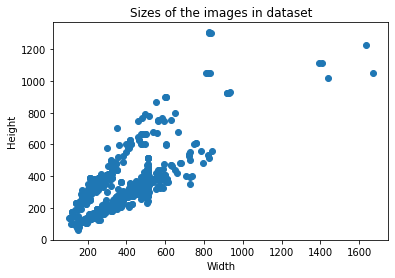

In [7]:
scatter(['Covid-CT/CT_COVID','Covid-CT/CT_NonCOVID'])

Padchest dataset

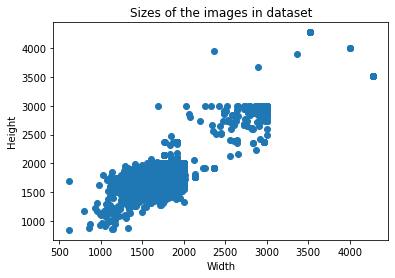

In [9]:
scatter(path_padchest)

## Slice Thickness
* IQ-OTH/NCCD - Lung Cancer data set - no information
* Covid-19 Chest X-Ray data set - no information
* Covid_CT - no information
* VinDr-CXT - no information
* Padchest - no information
* JSRT - no information

## SpatialResolution_DICOM
None of our datasets are in DICOM formats.

## Are dataset divided into training and testing sets?
* IQ-OTH/NCCD - Lung Cancer data set - there is folder with the test cases with drawn bounding boxes
* Covid-19 Chest X-Ray data set - no division
* Covid_CT - no division
* VinDr-CXT - there was a division, but because of big size of dataset analysis was conducted only on training set
* Padchest data set - no division
* Covid_CTJSRT

## Information about countries where pictures where taken
* IQ-OTH/NCCD - Lung Cancer data set - Iraq
* Covid-19 Chest X-Ray data set - all around the world
* Covid_CT - China
* VinDr-CXT - Vietnam
* JSRT - Japan
* Padchest - Spain

In [62]:
metadata_df = pd.read_csv("covid-chestxray-dataset/metadata.csv")

In [64]:
metadata_df['location'].unique()

array(['Cho Ray Hospital, Ho Chi Minh City, Vietnam',
       'Changhua Christian Hospital, Changhua City, Taiwan ', nan,
       'Wuhan Jinyintan Hospital, Wuhan, Hubei Province, China',
       'Mount Sinai Hospital, Toronto, Ontario, Canada',
       'Sunnybrook Health Sciences Centre, Toronto, Ontario, Canada',
       'Tongji Medical College, Wuhan, Hubei Province, China',
       'Snohomish County, Washington, United States', 'Hong Kong',
       'Sichuan Provincial People’s Hospital, Chengdu, China',
       'Myongji Hospital, Goyang, South Korea',
       'Jinling Hospital, Medical School of Nanjing University, Nanjing, Jiangsu, China',
       'Taoyuan General Hospital, Taoyuan, Taiwan', 'Jonkoping, Sweden',
       'Macao, China', 'Riccione, Italy',
       'Ospedale Santo Spirito. Rome, Italy',
       "Royal Brisbane and Women's Hospital, Brisbane, Australia",
       'Melbourne, Australia', 'Laniado Hospital, Netanya, Israel',
       'Italy', 'Hospital of Wuhan University, Wuhan, China'

Covid_CT

In [23]:
covid_meta=pd.read_excel("Covid-CT-Metainfo.xlsx")
covid_meta.Location.dropna().unique()

array(['Wuhan, China', 'Beijing, China', 'Shenzhen, China',
       'Sichuan, China', 'Shanghai, China', 'Hubei, China',
       'Zhejiang, China ', 'China', 'Hunan, China', 'Guangdon, China',
       'Wuhan, China ', 'Changsha, China.', 'Jingmen, Hubei, China',
       'Qingdao, China', 'a cruise ship “Diamond Princess” in Japan. ',
       'Hainan, China', "Xi'an, China "], dtype=object)